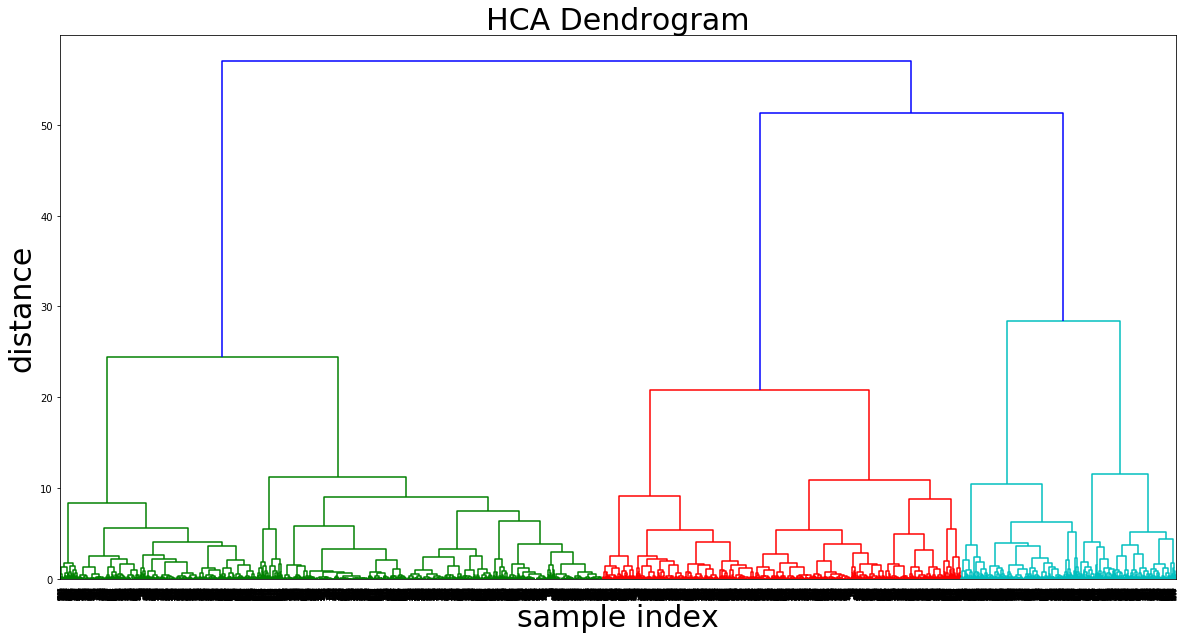

In [6]:
# %load HeirarchicalClustering.py
# Name: Sanchita Kanade
# Red Id: 822108710
# Class: CS653 Data Mining And Knowledge (Spring 2019)
# file: HeirarchicalClustering.py
# Final project 

import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.decomposition import PCA

# loading data
data = pd.read_csv(r'BlackFriday.csv') 

# randomly selecting 100128 samples from the dataframe
data = data.sample(100128) 

# sorting values in the dataset based on Purchase column
data.sort_values('Purchase', inplace = True)

# filtering the dataset 
new_data = data[ data['Purchase'] > 17000 ]

# transforming Gender attribute values from string to integer form
Gender = new_data['Gender'].map({'M': 0, 'F': 1}) 

Age = new_data['Age']

# transforming Age attribute values from string to integer form
Age = Age.map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

purchase = new_data['Purchase']

occupation = new_data['Occupation']
Marital_Status = new_data['Marital_Status']

# creating a feature vector by selecting subset of attributes.
x = np.column_stack((Gender,Age,occupation,Marital_Status,purchase))

# data normalization 
min = np.min(x,0)
max = np.max(x,0)
normed_x = (x - min)/(max - min)

# calculating pairwise distance between samples using euclidean distance metric
Y = pdist(normed_x, 'euclidean')

# Using Ward's method for performing heirarchical clustering
Z = linkage(Y, 'ward') 

# plotting dendrogram 
plt.figure(figsize=(20, 10))
plt.title('HCA Dendrogram',fontsize = 30)
plt.xlabel('sample index',fontsize = 30)
plt.ylabel('distance',fontsize = 30)
dendrogram(Z)
plt.show()